#DATA PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/LibreOffice.csv?token=AMPMBOOOSKFTVHFD4CKDRHTAUOJWC -O LibreOffice.csv
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/bashtrace.csv?token=AMPMBOOAHEOW6Z7PPSOQ6H3AUOKJ6 -O bashtrace.csv
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/firefox.csv?token=AMPMBOJZAOJOJ5EXVH4D7JDAUOJ4Q -O firefox.csv
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/reddis.csv?token=AMPMBOI6UVPHFYKZZUF6RX3AUOJ6E -O reddis.csv
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/reddis_make123.csv?token=AMPMBOOAXT4STRZDCEZ7YSDAUOKNM -O reddismake.csv
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/script_lockstat.csv?token=AMPMBOMWWP3IVO7AMHE4ZKLAUOLUY -O lockstat.csv
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/firefox_lockstat.csv?token=AMPMBONSONXL2YA5AFYV46DAUOSPK -O firefox_lockstat.csv
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/redisbenchmark_lockstat.csv?token=AMPMBOKVUAS7OSNVLXMBUZ3AUOSTE -O redisbenchmark_lockstat.csv
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/rediscompile_lockstat.csv?token=AMPMBOMBHDZZ6MX7SKD5TVLAUOS3S -O rediscompile_lockstat.csv
!wget https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/libreofficewriter_lockstat.csv?token=AMPMBOOZ4IVS72CAXH5ZYGLAUOS54 -O libreofficewriter_lockstat.csv

--2021-05-11 12:46:37--  https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/LibreOffice.csv?token=AMPMBOOOSKFTVHFD4CKDRHTAUOJWC
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1638 (1.6K) [text/plain]
Saving to: ‘LibreOffice.csv’

LibreOffice.csv     100%[===================>]   1.60K  --.-KB/s    in 0s      

2021-05-11 12:46:37 (23.7 MB/s) - ‘LibreOffice.csv’ saved [1638/1638]

--2021-05-11 12:46:38--  https://raw.githubusercontent.com/aasimmd/What-Is-My-Kernel-Doing/main/bashtrace.csv?token=AMPMBOOAHEOW6Z7PPSOQ6H3AUOKJ6
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
bashtrace = pd.read_csv('bashtrace.csv').fillna(0)
firefox = pd.read_csv('firefox.csv').fillna(0)
reddis = pd.read_csv('reddis.csv').fillna(0)
LibreOffice = pd.read_csv('LibreOffice.csv').fillna(0)
red_make=pd.read_csv('reddismake.csv').fillna(0)
bash_lock=pd.read_csv('lockstat.csv').fillna(0)
firefox_lockstat = pd.read_csv('firefox_lockstat.csv').fillna(0)
redisbenchmark_lockstat = pd.read_csv('redisbenchmark_lockstat.csv').fillna(0)
libreofficewriter_lockstat = pd.read_csv('libreofficewriter_lockstat.csv').fillna(0)
rediscompile_lockstat = pd.read_csv('rediscompile_lockstat.csv').fillna(0)

In [ ]:
red_make

,% time,seconds,usecs/call,calls,errors,syscall
0,100.00,41.431234,41431234,1,0.0,wait4
1,0.00,0.000005,5,1,1.0,stat
2,0.00,0.000004,2,2,0.0,rt_sigprocmask
3,0.00,0.000004,4,1,0.0,chdir
4,0.00,0.000002,2,1,0.0,close
5,100.00,41.431210,41431210,1,0.0,wait4
6,0.00,0.000000,0,1,0.0,rt_sigreturn
7,99.97,13.288051,168203,79,0.0,wait4
8,0.02,0.002032,26,78,0.0,vfork
9,0.01,0.001276,5,253,80.0,stat


In [ ]:
l=[bashtrace,firefox,reddis,LibreOffice,red_make]

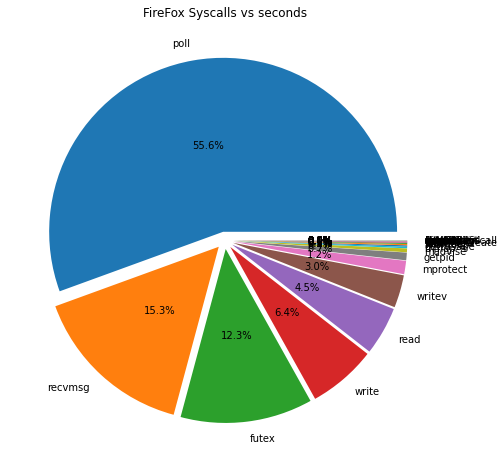

In [ ]:
#for i in l:
fig_dim = (8,8)
f, ax = plt.subplots(figsize=fig_dim)
quality=firefox["syscall"]
size=firefox["seconds"]

plt.pie(size,labels=quality,autopct="%.1f%%",explode=[0.05]*len(firefox),pctdistance=0.5)
plt.title("FireFox Syscalls vs seconds")
plt.show()

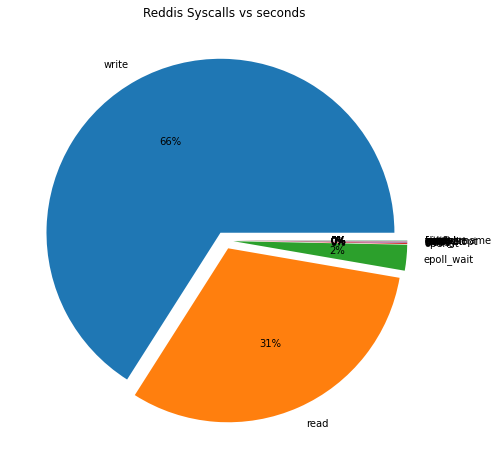

In [ ]:
fig_dim = (8,8)
f, ax = plt.subplots(figsize=fig_dim)
quality=reddis["syscall"]
size=reddis["seconds"]

plt.pie(size,labels=quality,autopct='%1.0f%%',explode=[0.05]*len(reddis))
plt.title("Reddis Syscalls vs seconds")
plt.show()

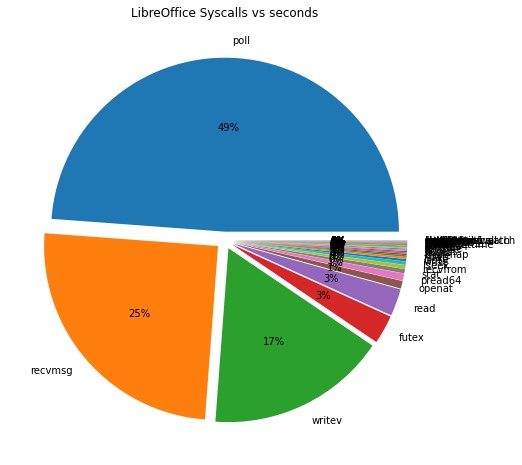

In [ ]:
fig_dim = (8,8)
f, ax = plt.subplots(figsize=fig_dim)
quality=LibreOffice["syscall"]
size=LibreOffice["% time"]

plt.pie(size,labels=quality,autopct='%1.0f%%',explode=[0.05]*len(LibreOffice))
plt.title("LibreOffice Syscalls vs seconds")
plt.show()

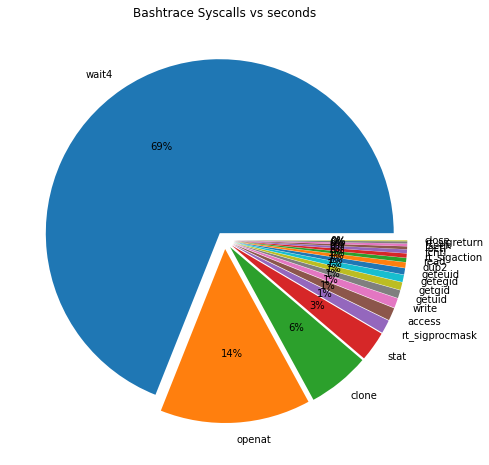

In [ ]:
fig_dim = (8,8)
f, ax = plt.subplots(figsize=fig_dim)
quality=bashtrace["syscall"]
size=bashtrace["% time"]

plt.pie(size,labels=quality,autopct='%1.0f%%',explode=[0.05]*len(bashtrace))
plt.title("Bashtrace Syscalls vs seconds")
plt.show()

In [ ]:
df2 = red_make.groupby(['syscall'],as_index=False).sum()

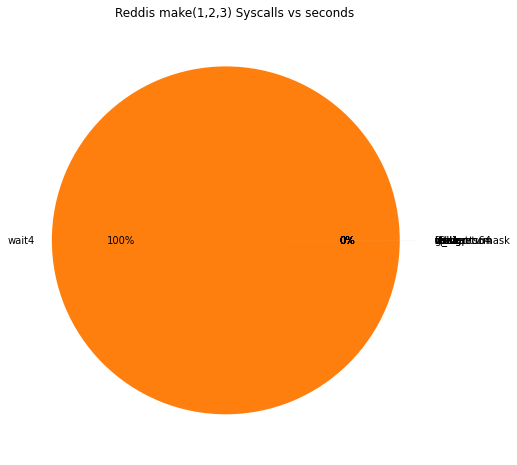

In [ ]:
fig_dim = (8,8)
f, ax = plt.subplots(figsize=fig_dim)
quality=df2["syscall"]
size=df2["seconds"]

plt.pie(size,labels=quality,autopct='%1.0f%%',explode=[0.05]*len(df2))
plt.title("Reddis make(1,2,3) Syscalls vs seconds")
plt.show()

In [ ]:
df2.drop('% time',
  axis='columns', inplace=True)

In [ ]:
df2

,syscall,seconds,usecs/call,calls,errors
0,brk,0.000030,6,5,0.0
1,chdir,0.000009,9,2,0.0
2,close,0.000019,5,6,0.0
3,fstat,0.000008,2,4,0.0
4,getdents64,0.000056,9,6,0.0
5,openat,0.000041,5,8,4.0
6,read,0.000006,3,2,0.0
7,rt_sigprocmask,0.000563,3,312,0.0
8,rt_sigreturn,0.000000,0,1,0.0
9,stat,0.001281,10,254,81.0


In [ ]:
df2

,syscall,seconds,usecs/call,calls,errors
0,brk,0.000030,6,5,0.0
1,chdir,0.000009,9,2,0.0
2,close,0.000019,5,6,0.0
3,fstat,0.000008,2,4,0.0
4,getdents64,0.000056,9,6,0.0
5,openat,0.000041,5,8,4.0
6,read,0.000006,3,2,0.0
7,rt_sigprocmask,0.000563,3,312,0.0
8,rt_sigreturn,0.000000,0,1,0.0
9,stat,0.001281,10,254,81.0


In [ ]:
bash_hold = bash_lock['holdtime-total'].sum()
bash_wait = bash_lock['waittime-total'].sum()
firefox_wait = firefox_lockstat['waittime-total'].sum()
firefox_hold = firefox_lockstat['holdtime-total'].sum()
redisbench_hold = redisbenchmark_lockstat['holdtime-total'].sum()
redisbench_wait = redisbenchmark_lockstat['waittime-total'].sum()
libre_hold = libreofficewriter_lockstat['holdtime-total'].sum()
libre_wait = libreofficewriter_lockstat['waittime-total'].sum()
rediscompile_hold = rediscompile_lockstat['holdtime-total'].sum()
rediscompile_wait = rediscompile_lockstat['waittime-total'].sum()

In [ ]:
total_wait = firefox_wait + redisbench_wait+  libre_wait + rediscompile_wait + bash_wait

In [ ]:
total_hold = firefox_hold + redisbench_hold+  libre_hold + rediscompile_hold + bash_hold

In [ ]:
print(total_wait)

1788414.3000000003


In [ ]:
print(total_hold)

6581410963.889999


In [ ]:
hold_times = [firefox_hold , redisbench_hold,  libre_hold , rediscompile_hold ,bash_hold]
wait_times = [firefox_wait , redisbench_wait,  libre_wait , rediscompile_wait , bash_wait]
titles = ['firefox','redisbench','libreoffice','rediscompile','bash']

In [ ]:
lock_df = pd.DataFrame(list(zip(titles,hold_times, wait_times)),columns =['Process', 'Hold time','Wait Time'])

In [ ]:
lock_df

,Process,Hold time,Wait Time
0,firefox,4.966728e+07,1512782.60
1,redisbench,3.343061e+08,234920.26
2,libreoffice,6.141706e+09,11854.07
3,rediscompile,5.511179e+07,27118.79
4,bash,6.198060e+05,1738.58


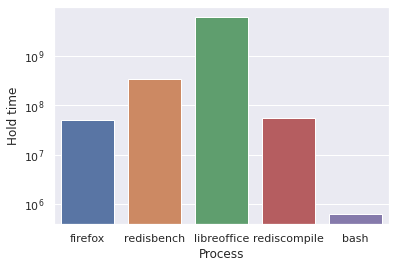

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Process", y="Hold time", data=lock_df)
plt.yscale("log")
plt.show()

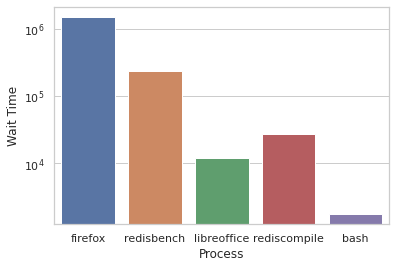

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Process", y="Wait Time", data=lock_df)
plt.yscale("log")
plt.show()